# Object Classification with YOLOv8

This notebook demonstrates training a YOLOv8 model for object classification, specifically for car detection with multiple classes. It covers data loading, model training, evaluation, and inference.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# === PATH DEFINITIONS ===
import os # Import os here as it's used immediately

DRIVE_MOUNT_POINT = '/content/drive'
BASE_PROJECT_PATH = '/content/drive/MyDrive/Projects/Car Detection v2/'
DATASET_BASE_PATH = os.path.join(BASE_PROJECT_PATH, 'Multi Class Data - Augmented')

# Training data paths
TRAIN_IMAGES_PATH = os.path.join(DATASET_BASE_PATH, 'train/images/')
TRAIN_LABELS_PATH = os.path.join(DATASET_BASE_PATH, 'train/labels/')

# Validation data paths
VALID_IMAGES_PATH = os.path.join(DATASET_BASE_PATH, 'valid/images/')
VALID_LABELS_PATH = os.path.join(DATASET_BASE_PATH, 'valid/labels/')

# Test data path
TEST_IMAGES_DIR = os.path.join('/content/drive/MyDrive/Projects/Car Detection v2/Multi Class Data/test/images')

# Dataset configuration file
DATASET_YAML_PATH = os.path.join(DATASET_BASE_PATH, 'data.yaml')

# Model training output paths
MODEL_OUTPUT_BASE_PATH = os.path.join(BASE_PROJECT_PATH, 'Colab Env/Model History')
EXPERIMENT_NAME = 'multiclass_colab_YOLOv8_aug1'
FULL_EXPERIMENT_PATH = os.path.join(MODEL_OUTPUT_BASE_PATH, EXPERIMENT_NAME)

# Paths to specific files generated during training
BEST_WEIGHTS_PATH = os.path.join(FULL_EXPERIMENT_PATH, 'weights/best.pt')
RESULTS_CSV_PATH = os.path.join(FULL_EXPERIMENT_PATH, 'results.csv')
CONFUSION_MATRIX_IMG_PATH = os.path.join(FULL_EXPERIMENT_PATH, 'confusion_matrix.png')

# Paths to video test
VIDEO_TEST = os.path.join(BASE_PROJECT_PATH, 'Video Test')
VIDEO_TEST_PREDICTION = os.path.join(BASE_PROJECT_PATH, 'Video Test Prediction Colab Env')

print(f"Base Project Path: {BASE_PROJECT_PATH}")
print(f"Dataset Path: {DATASET_BASE_PATH}")
print(f"Dataset YAML Path: {DATASET_YAML_PATH}")
print(f"Model Output Path: {FULL_EXPERIMENT_PATH}")
print(f"Best Weights will be saved to: {BEST_WEIGHTS_PATH}")

Base Project Path: /content/drive/MyDrive/Projects/Car Detection v2/
Dataset Path: /content/drive/MyDrive/Projects/Car Detection v2/Multi Class Data - Augmented
Dataset YAML Path: /content/drive/MyDrive/Projects/Car Detection v2/Multi Class Data - Augmented/data.yaml
Model Output Path: /content/drive/MyDrive/Projects/Car Detection v2/Colab Env/Model History/multiclass_colab_YOLOv8_aug1
Best Weights will be saved to: /content/drive/MyDrive/Projects/Car Detection v2/Colab Env/Model History/multiclass_colab_YOLOv8_aug1/weights/best.pt


## 1. Install Dependencies & Import Libraries

In [ ]:
# === Installations (if not already installed in your environment) ===
!pip install ultralytics matplotlib seaborn pandas squarify opencv-python

# === System & I/O ===
import random
import glob

# === Data & Visualization ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import matplotlib.image as mpimg

# === Computer Vision & Model ===
import cv2
from ultralytics import YOLO

# Configure plotting style for seaborn and matplotlib
sns.set_style('darkgrid')
%matplotlib inline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

## 2. Dataset Verification & Exploration
Verify that the dataset paths are correct and explore some sample images.

In [ ]:
# Verify dataset directory
if os.path.exists(DATASET_BASE_PATH):
    print(f"Dataset directory listing for: {DATASET_BASE_PATH}")
    print(os.listdir(DATASET_BASE_PATH))
else:
    print(f"ERROR: Dataset base path not found: {DATASET_BASE_PATH}")

if os.path.exists(TRAIN_IMAGES_PATH):
    print(f"\nTrain images directory listing for: {TRAIN_IMAGES_PATH}")
else:
    print(f"ERROR: Train images path not found: {TRAIN_IMAGES_PATH}")

Dataset directory listing for: /content/drive/MyDrive/Projects/Car Detection v2/Multi Class Data - Augmented
['data.yaml', 'train', 'valid']

Train images directory listing for: /content/drive/MyDrive/Projects/Car Detection v2/Multi Class Data - Augmented/train/images/


In [ ]:
# Count number of training images
if os.path.exists(TRAIN_IMAGES_PATH):
    train_image_files_list = os.listdir(TRAIN_IMAGES_PATH)
    number_train_files = len(train_image_files_list)
    print(f"Number of training images: {number_train_files}")
else:
    print(f"Cannot count training images, path not found: {TRAIN_IMAGES_PATH}")
    number_train_files = 0

Number of training images: 5682


In [ ]:
# Show 16 random annotated training images
if number_train_files >= 16:
    sample_files = random.sample(train_image_files_list, 16)
    fig, axs = plt.subplots(4, 4, figsize=(16, 16))
    fig.suptitle('Sample Annotated Training Images', fontsize=20)

    for i, fname in enumerate(sample_files):
        img_path = os.path.join(TRAIN_IMAGES_PATH, fname)
        label_fname = os.path.splitext(fname)[0] + '.txt'
        label_path = os.path.join(TRAIN_LABELS_PATH, label_fname)

        img = cv2.imread(img_path)
        if img is None:
            print(f"Warning: Could not read image {img_path}")
            continue

        # Read and draw each bounding box
        if os.path.exists(label_path):
            with open(label_path) as f:
                for line in f.read().splitlines():
                    try:
                        cls, x_c, y_c, w, h = map(float, line.split())
                        x1 = int((x_c - w / 2) * img.shape[1])
                        y1 = int((y_c - h / 2) * img.shape[0])
                        x2 = int((x_c + w / 2) * img.shape[1])
                        y2 = int((y_c + h / 2) * img.shape[0])
                        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2) # Green box
                    except ValueError:
                        print(f"Warning: Malformed label in {label_path}: {line}")
        else:
            print(f"Warning: Label file not found for {fname} at {label_path}")


        ax = axs[i // 4, i % 4]
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.set_title(fname, fontsize=8)
        ax.axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make space for suptitle
    plt.show()
elif number_train_files > 0:
    print(f"Not enough training images to display 16 samples. Found {number_train_files}.")
else:
    print("No training images found to display.")

Output hidden; open in https://colab.research.google.com to view.

## 3. YOLOv8 Model Training
Initialize the YOLOv8 model and start the training process.

In [ ]:
model = YOLO('yolov8x.pt')

IMG_HEIGHT = 300

if os.path.exists(DATASET_YAML_PATH):
    print(f"Starting training with configuration file: {DATASET_YAML_PATH}")
    results = model.train(
        data=DATASET_YAML_PATH,
        epochs=10,
        imgsz=IMG_HEIGHT,
        seed=42,
        batch=32,
        workers=8,
        project=MODEL_OUTPUT_BASE_PATH,
        name=EXPERIMENT_NAME,
        exist_ok=True,
    )
    print(f"Training complete. Results saved in: {FULL_EXPERIMENT_PATH}")
else:
    print(f"ERROR: Dataset YAML file not found at {DATASET_YAML_PATH}. Cannot start training.")
    results = None # Ensure 'results' is defined even if training doesn't run

100%|██████████| 131M/131M [00:01<00:00, 116MB/s]


Starting training with configuration file: /content/drive/MyDrive/Projects/Car Detection v2/Multi Class Data - Augmented/data.yaml
Ultralytics 8.3.150 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Projects/Car Detection v2/Multi Class Data - Augmented/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=300, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8x.pt, momentum=0.937, 

100%|██████████| 755k/755k [00:00<00:00, 20.4MB/s]

Overriding model.yaml nc=80 with nc=13

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              


  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics.nn.modules.conv.Conv             [640, 640, 3, 2]              
  8                  -1  3   6969600  ultralytics.nn.modules.block.C2f             [640, 640, 3, True]           
  9                  -1  1   1025920  ultralytics.nn.modules.block.SPPF            [640, 640, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  3   7379200  ultralytics.nn.modules.block.C2f             [1280, 640, 3]                
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 106MB/s]


AMP: checks passed ✅
WARNING ⚠️ imgsz=[300] must be multiple of max stride 32, updating to [320]
train: Fast image access ✅ (ping: 0.3±0.1 ms, read: 0.4±0.1 MB/s, size: 150.4 KB)


train: Scanning /content/drive/MyDrive/Projects/Car Detection v2/Multi Class Data - Augmented/train/labels.cache... 5682 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5682/5682 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.4±0.0 ms, read: 0.4±0.1 MB/s, size: 141.1 KB)


val: Scanning /content/drive/MyDrive/Projects/Car Detection v2/Multi Class Data - Augmented/valid/labels.cache... 936 images, 0 backgrounds, 0 corrupt: 100%|██████████| 936/936 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/Projects/Car Detection v2/Colab Env/Model History/multiclass_colab_YOLOv8_aug1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/Projects/Car Detection v2/Colab Env/Model History/multiclass_colab_YOLOv8_aug1
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      6.49G      1.118        1.7      1.154         50        320: 100%|██████████| 178/178 [01:53<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.46it/s]

                   all        936       2235      0.378      0.283      0.269      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      6.75G      1.047      1.267      1.102         39        320: 100%|██████████| 178/178 [01:55<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.57it/s]

                   all        936       2235      0.407      0.417      0.402      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      7.01G      1.011      1.104      1.089         34        320: 100%|██████████| 178/178 [01:53<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.58it/s]

                   all        936       2235      0.539       0.44       0.46      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      7.02G     0.9937       1.01      1.094         31        320: 100%|██████████| 178/178 [01:53<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.58it/s]

                   all        936       2235      0.599      0.576      0.602      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         7G     0.9674     0.8826      1.096         53        320: 100%|██████████| 178/178 [01:53<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.57it/s]

                   all        936       2235      0.645      0.588      0.628      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      7.02G     0.9316     0.7656      1.078         47        320: 100%|██████████| 178/178 [01:53<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.57it/s]

                   all        936       2235      0.665      0.644      0.686      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      7.01G     0.9023     0.6814      1.059         50        320: 100%|██████████| 178/178 [01:53<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.58it/s]

                   all        936       2235      0.759       0.69      0.701      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      7.02G     0.8731     0.6039      1.046         41        320: 100%|██████████| 178/178 [01:53<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.58it/s]

                   all        936       2235      0.813      0.681      0.731      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      7.02G     0.8454     0.5335      1.034         42        320: 100%|██████████| 178/178 [01:53<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.58it/s]

                   all        936       2235      0.774      0.712      0.744       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      7.01G     0.8098     0.4725      1.017         48        320: 100%|██████████| 178/178 [01:53<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.58it/s]

                   all        936       2235      0.826      0.701      0.759      0.573



10 epochs completed in 0.354 hours.
Optimizer stripped from /content/drive/MyDrive/Projects/Car Detection v2/Colab Env/Model History/multiclass_colab_YOLOv8_aug1/weights/last.pt, 136.7MB
Optimizer stripped from /content/drive/MyDrive/Projects/Car Detection v2/Colab Env/Model History/multiclass_colab_YOLOv8_aug1/weights/best.pt, 136.7MB

Validating /content/drive/MyDrive/Projects/Car Detection v2/Colab Env/Model History/multiclass_colab_YOLOv8_aug1/weights/best.pt...
Ultralytics 8.3.150 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,136,087 parameters, 0 gradients, 257.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.42it/s]


                   all        936       2235      0.825      0.699      0.759      0.574
                 BAJAJ         33         33      0.712      0.598      0.717       0.43
              BOXTRUCK         30         30      0.873      0.691      0.754      0.528
                   BUS         72         72      0.995          1      0.995      0.818
               CITYCAR        180        207      0.717      0.657      0.724      0.539
             CROSSOVER          9          9          1          0     0.0756     0.0605
             HATCHBACK         42         45      0.849      0.644       0.76        0.6
              MINI BUS          9          9      0.632      0.667      0.561       0.49
                   MPV        708       1191      0.858      0.867      0.922      0.695
                PICKUP         36         36      0.847      0.806      0.919      0.722
                 SEDAN         87         96      0.854      0.856       0.92      0.682
                   SU

## 4. Training Results Analysis
Plot the training and validation metrics to observe the model's learning progress.

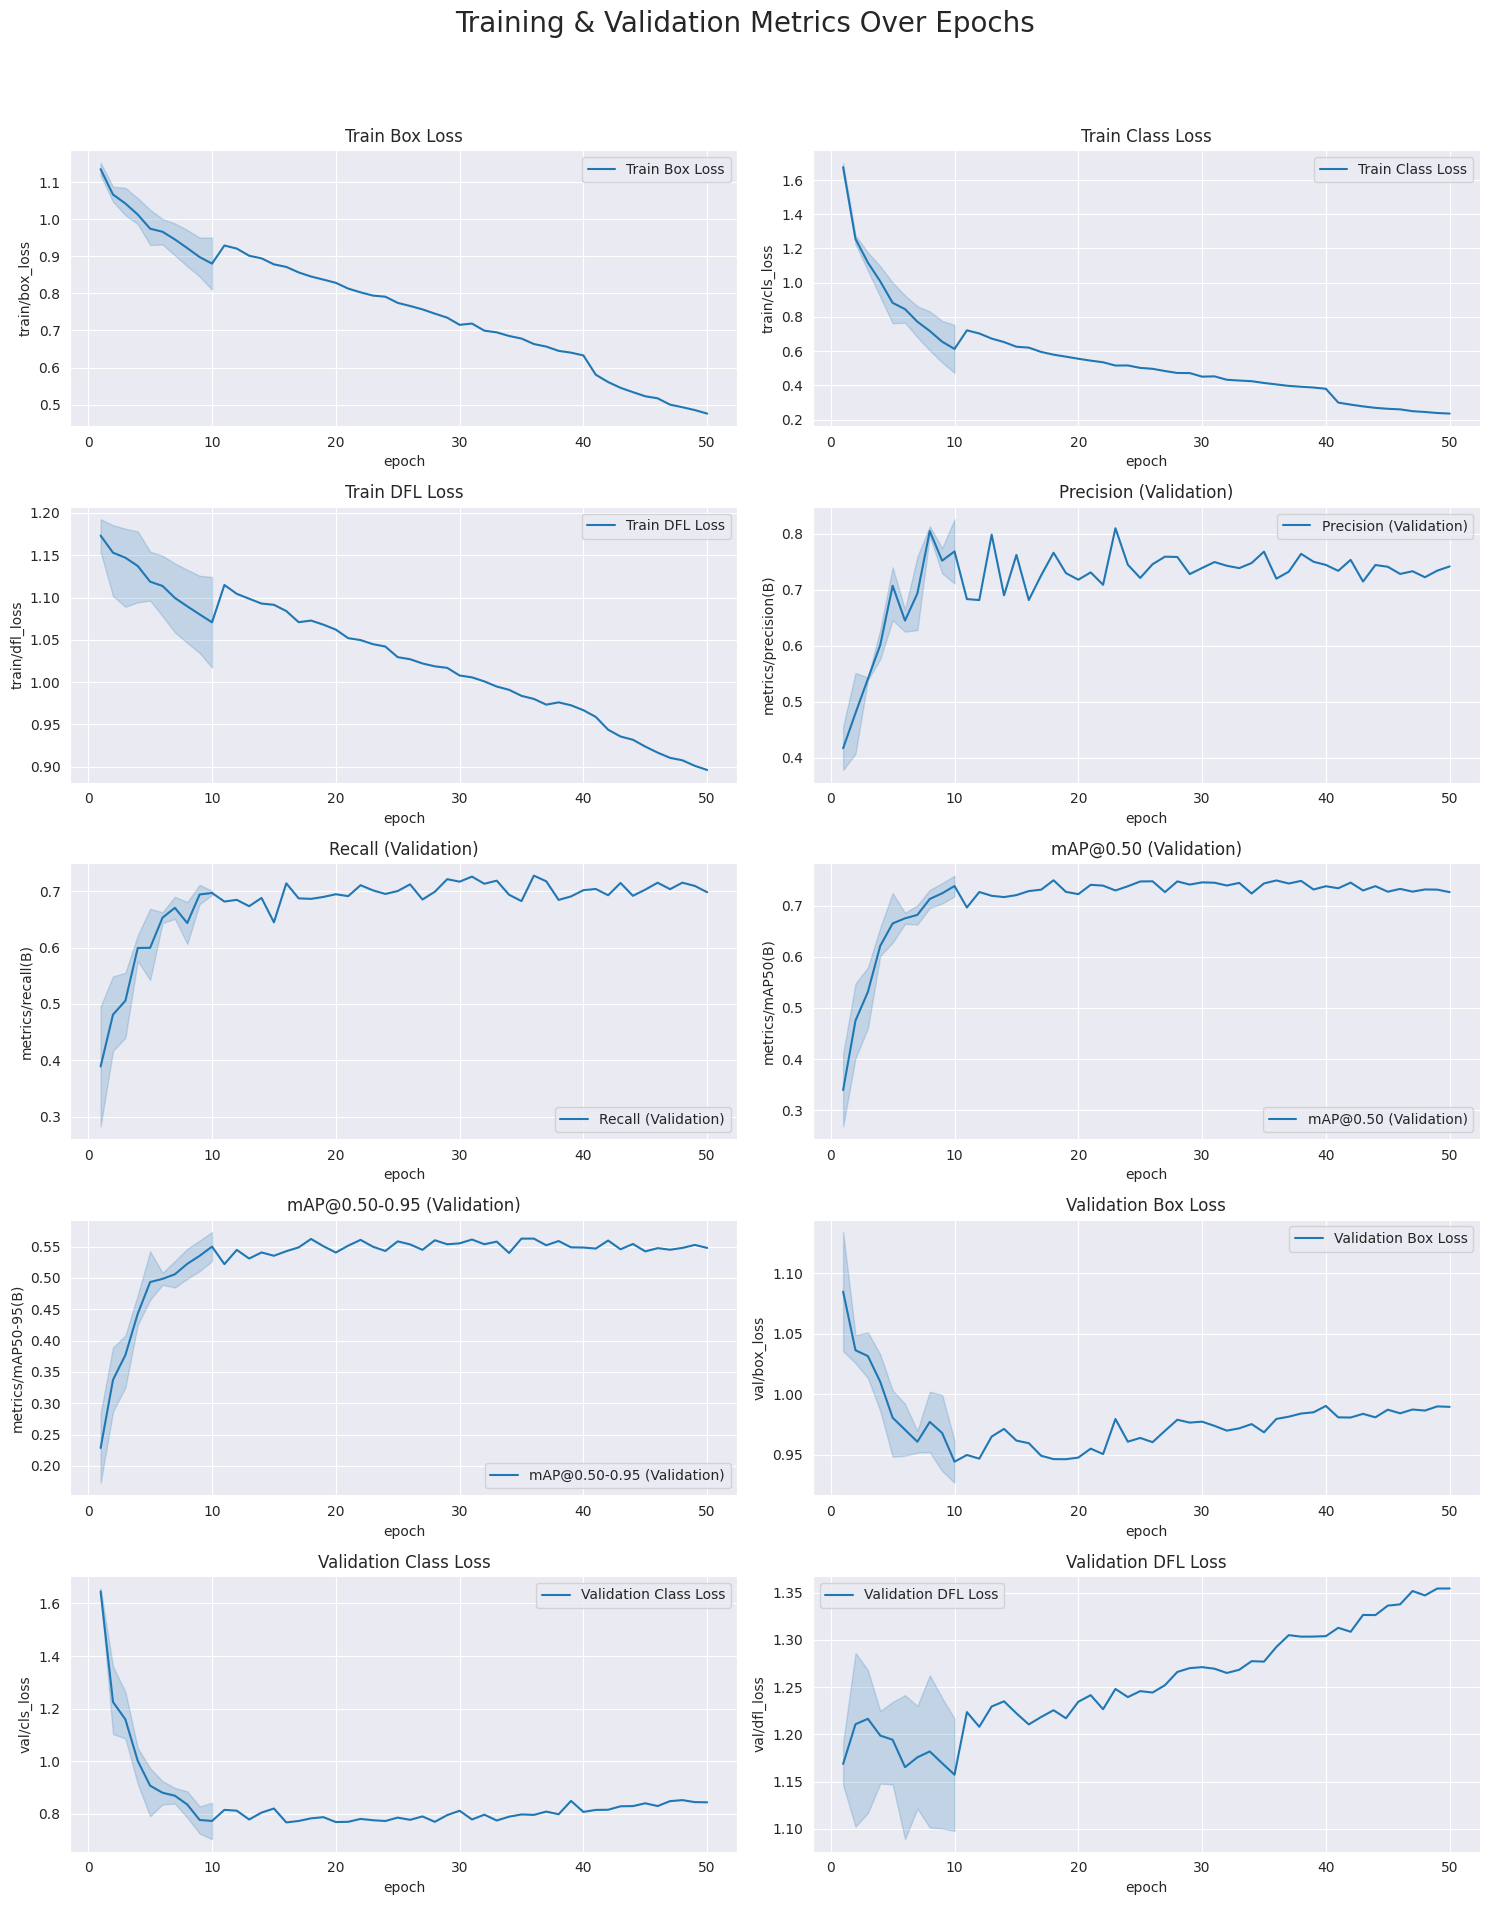

In [ ]:
# Read training log (results.csv)
if os.path.exists(RESULTS_CSV_PATH):
    df_results = pd.read_csv(RESULTS_CSV_PATH)
    df_results.columns = df_results.columns.str.strip() # Tidy column names

    plot_definitions = [
        ('train/box_loss', 'Train Box Loss'),
        ('train/cls_loss', 'Train Class Loss'),
        ('train/dfl_loss', 'Train DFL Loss'), # Distribution Focal Loss
        ('metrics/precision(B)', 'Precision (Validation)'),
        ('metrics/recall(B)', 'Recall (Validation)'),
        ('metrics/mAP50(B)', 'mAP@0.50 (Validation)'),
        ('metrics/mAP50-95(B)', 'mAP@0.50-0.95 (Validation)'),
        ('val/box_loss', 'Validation Box Loss'),
        ('val/cls_loss', 'Validation Class Loss'),
        ('val/dfl_loss', 'Validation DFL Loss')
    ]

    num_plots = len(plot_definitions)
    num_cols = 2 # Number of columns for subplots
    num_rows = (num_plots + num_cols - 1) // num_cols # Calculate rows needed

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4)) # Adjust figsize as needed
    axs = axs.flatten() # Flatten to easily iterate

    for i, (col, title) in enumerate(plot_definitions):
        if col in df_results.columns:
            sns.lineplot(data=df_results, x='epoch', y=col, ax=axs[i], label=title).set_title(title)
            axs[i].legend()
        else:
            print(f"Warning: Column '{col}' not found in results.csv. Skipping plot for '{title}'.")
            if i < len(axs): # Hide unused subplot if column is missing
                axs[i].axis('off')


    # Hide any remaining empty subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    fig.suptitle('Training & Validation Metrics Over Epochs', fontsize=20)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for suptitle
    plt.show()
else:
    print(f"Training results CSV not found at: {RESULTS_CSV_PATH}. Cannot plot metrics.")

## 5. Model Evaluation on Validation Set
Load the best performing weights from the training and evaluate the model on the validation dataset.

In [ ]:
# Load best-performing weights for evaluation
if os.path.exists(BEST_WEIGHTS_PATH):
    print(f"Loading best model from: {BEST_WEIGHTS_PATH}")
    model_best = YOLO(BEST_WEIGHTS_PATH)

    print("Running validation on the 'val' split with the best model...")
    validation_metrics = model_best.val(
        data=DATASET_YAML_PATH,
        conf=0.25,
        iou=0.45,
        split='val',
    )
    print("\nValidation Metrics Summary:")
    print(f"  mAP50-95 (Box): {validation_metrics.box.map:.4f}")
    print(f"  mAP50 (Box):    {validation_metrics.box.map50:.4f}")
    print(f"  mAP75 (Box):    {validation_metrics.box.map75:.4f}")
else:
    print(f"Best weights file not found at: {BEST_WEIGHTS_PATH}. Cannot perform validation.")
    validation_metrics = None

Loading best model from: /content/drive/MyDrive/Projects/Car Detection v2/Colab Env/Model History/multiclass_colab_YOLOv8_aug1/weights/best.pt
Running validation on the 'val' split with the best model...
Ultralytics 8.3.150 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,136,087 parameters, 0 gradients, 257.5 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 98.5±24.8 MB/s, size: 169.9 KB)


val: Scanning /content/drive/MyDrive/Projects/Car Detection v2/Multi Class Data - Augmented/valid/labels.cache... 936 images, 0 backgrounds, 0 corrupt: 100%|██████████| 936/936 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [00:23<00:00,  2.56it/s]


                   all        936       2235      0.742      0.709      0.755      0.587
                 BAJAJ         33         33      0.715      0.636      0.738      0.465
              BOXTRUCK         30         30      0.874      0.696      0.759      0.573
                   BUS         72         72          1          1      0.995      0.836
               CITYCAR        180        207      0.693      0.657      0.733       0.56
             CROSSOVER          9          9          0          0          0          0
             HATCHBACK         42         45      0.836      0.644      0.759      0.606
              MINI BUS          9          9      0.667      0.667      0.667      0.583
                   MPV        708       1191      0.852      0.872      0.906      0.699
                PICKUP         36         36      0.837      0.806      0.889      0.712
                 SEDAN         87         96      0.853      0.865      0.897      0.695
                   SU

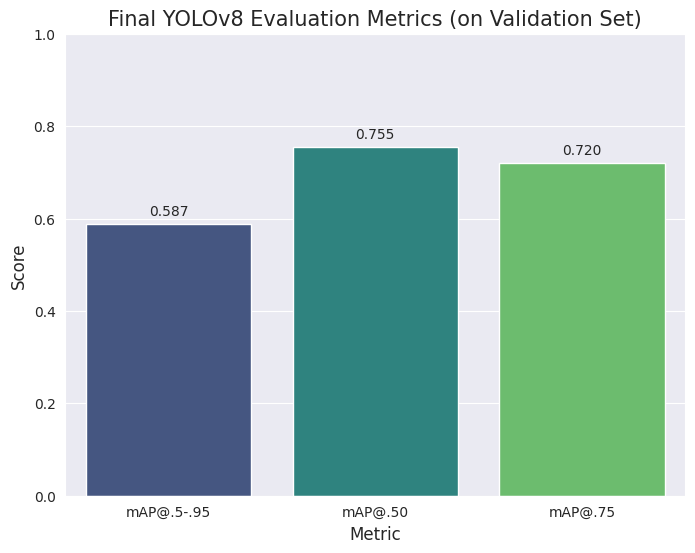

In [ ]:
# Bar chart for key mAP metrics from validation
if validation_metrics:
    map_values = [
        validation_metrics.box.map,
        validation_metrics.box.map50,
        validation_metrics.box.map75
    ]
    map_labels = ['mAP@.5-.95', 'mAP@.50', 'mAP@.75']

    plt.figure(figsize=(8, 6))
    ax_map = sns.barplot(x=map_labels, y=map_values, palette="viridis")
    ax_map.set_title('Final YOLOv8 Evaluation Metrics (on Validation Set)', fontsize=15)
    ax_map.set_ylabel('Score', fontsize=12)
    ax_map.set_xlabel('Metric', fontsize=12)
    ax_map.set_ylim(0, 1)

    # Annotate bars with their values
    for p in ax_map.patches:
        ax_map.annotate(f'{p.get_height():.3f}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 9),
                        textcoords='offset points', fontsize=10)
    plt.show()
else:
    print("Validation metrics not available to plot.")

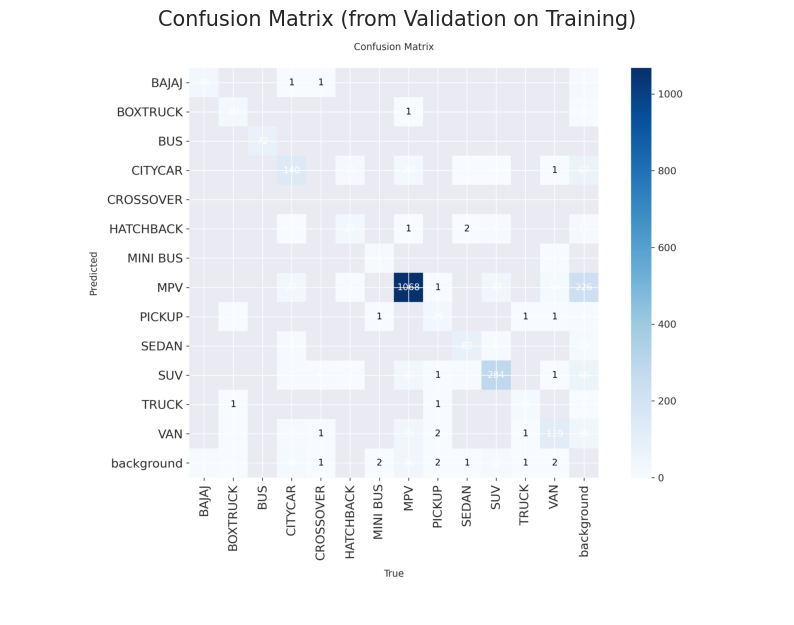

In [ ]:
if os.path.exists(CONFUSION_MATRIX_IMG_PATH):
    cm_img = mpimg.imread(CONFUSION_MATRIX_IMG_PATH)
    plt.figure(figsize=(10, 10)) # Adjust size as needed
    plt.imshow(cm_img)
    plt.axis('off') # Turn off axis numbers and ticks
    plt.title('Confusion Matrix (from Validation on Training)', fontsize=15) # Or "from model.val() call"
    plt.show()
else:
    print(f"Confusion matrix image not found at: {CONFUSION_MATRIX_IMG_PATH}")
    print(f"Ensure that training/validation has completed and generated this file, or check the 'name' parameter in model.val() if you ran it separately.")
    print(f"Files in experiment directory ({FULL_EXPERIMENT_PATH}): {os.listdir(FULL_EXPERIMENT_PATH) if os.path.exists(FULL_EXPERIMENT_PATH) else 'Directory not found'}")

## 6. Inference on Test Images
Perform inference on new, unseen images from the test set (or any other images) using the trained model.

In [ ]:
# Inference Function
def run_inference_on_image(image_path, yolo_model, confidence_threshold=0.25, iou_threshold=0.45):
    if not os.path.exists(image_path):
        print(f"Error: Image not found at {image_path}")
        return None

    img_bgr = cv2.imread(image_path)
    if img_bgr is None:
        print(f"Error: Could not read image {image_path}")
        return None

    # Perform inference
    results = yolo_model.predict(
        source=img_bgr,
        conf=confidence_threshold,
        iou=iou_threshold,
    )

    annotated_img_bgr = results[0].plot()
    annotated_img_rgb = cv2.cvtColor(annotated_img_bgr, cv2.COLOR_BGR2RGB)

    return annotated_img_rgb

In [ ]:
# Test Inference on a few images from the TEST_IMAGES_DIR
if 'model_best' in locals() and model_best is not None: # Check if best model was loaded
    if os.path.exists(TEST_IMAGES_DIR) and os.listdir(TEST_IMAGES_DIR):
        test_image_files = [os.path.join(TEST_IMAGES_DIR, f) for f in os.listdir(TEST_IMAGES_DIR) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        if test_image_files:
            num_test_samples_to_show = min(len(test_image_files), 16) # Show up to 16 samples
            selected_test_images = random.sample(test_image_files, num_test_samples_to_show)

            # Determine grid size
            cols = 4
            rows = (num_test_samples_to_show + cols - 1) // cols
            fig_w = 16
            fig_h = rows * 4

            _, axes_test = plt.subplots(nrows=rows, ncols=cols, figsize=(fig_w, fig_h))
            axes_test = axes_test.flatten()

            for i, img_path in enumerate(selected_test_images):
                print(f"Running inference on: {img_path}")
                detected_img_output = run_inference_on_image(img_path, model_best, confidence_threshold=0.3)

                if detected_img_output is not None:
                    axes_test[i].imshow(detected_img_output)
                    axes_test[i].set_title(os.path.basename(img_path), fontsize=8)
                axes_test[i].axis('off')


            for j in range(i + 1, len(axes_test)):
                fig.delaxes(axes_test[j])


            plt.tight_layout()
            plt.suptitle(f'Inference on {num_test_samples_to_show} Random Test Samples', fontsize=16, y=1.02)
            plt.show()
        else:
            print(f"No image files found in the test directory: {TEST_IMAGES_DIR}")
    else:
        print(f"Test image directory not found or is empty: {TEST_IMAGES_DIR}")
else:
    print("Best model ('model_best') not loaded. Skipping inference on test images.")

Output hidden; open in https://colab.research.google.com to view.

## 7. Inference on Test Video
Perform inference on new, unseen video using the trained model.

In [ ]:
# Paths for video
in_vid  = os.path.join(VIDEO_TEST,'traffic_test.mp4')
out_vid = os.path.join(VIDEO_TEST_PREDICTION,'multiclass_colab_YOLOv8_50 epochs.mp4')

cap = cv2.VideoCapture(in_vid)
fps  = int(cap.get(cv2.CAP_PROP_FPS))
w    = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h    = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Prepare output writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out    = cv2.VideoWriter(out_vid, fourcc, fps, (w, h))

frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Run detection and get annotated frame
    result = model(frame)
    det_img = result[0].plot()

    out.write(det_img)
    frame_count += 1
    if frame_count % 30 == 0:
        print(f"Processed {frame_count} frames...")

cap.release()
out.release()
print("Video processing complete. Saved to:", out_vid)